# O que é o Spark

é uma engenharia de computação e um conjunto de bibliotecas para processamento de dados de modo paralelo em clusteres computacionais

nele podemos fazer de ponta a ponta a escrita de plataformas de big data, desde um carregamento de bases SQL até mesmo processamento em streaming

**o Spark não é um sistema de armazenamento de dados, seu foco é realizar computações de modo performático em dados independente de onde eles residam**



# Conceitos

**Clustered computing** se trata de uma coleção de recursos de múltiplas maquinas

**Parallel computing** se trata de computações simultâneas em um único computador

**Distributed computing** se trata de uma rede de computadores (nodes) que são rodadas em paralelo

**Batch processing** se refere ao processo de processar bateladas de processos ou dados de modo particionado em frações menores e em maquinas individuais

**Real-time processing** é o ato de processar imediatamente dados após sua aquisição ou criação

**Processamento in-memory** se trata de processamentos realizados na RAM do sistema

# SparkUI

disponível na porta 4040

muito útil para tuning e debbuging de jobs (conjunto de tranformações engatilhadas por ações)

# Estrutura - Framework

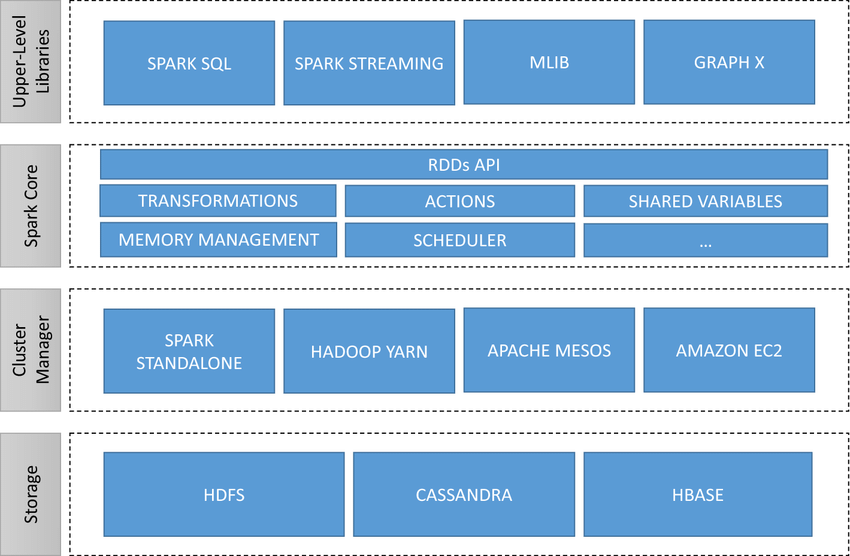

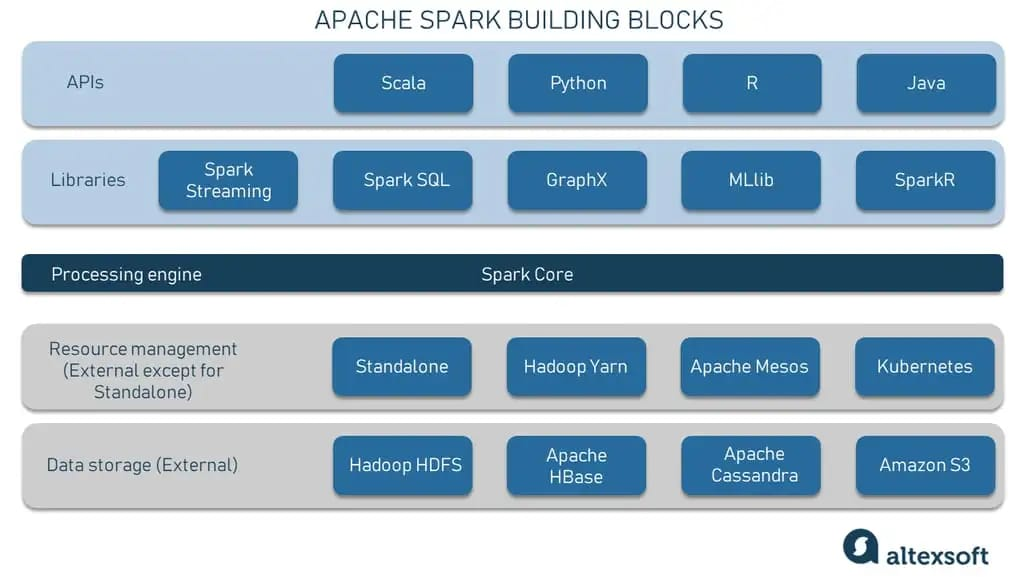

## *Catalyst Optimizer*

situado entre libraries e spark core

tem como função processar o código usando dataframes e datasets construídos em RDD's de modo otimizado

SparkSQL, Spark Streaming e Spark MLlib tem ele como intermediário antes de Spark Core

cria planos otimizados de execução

minimiza shuffling e sobrecarga computacional

realiza predicate pushdown e projection pruning

## *Libraries*

### **SparkSQL**

realiza operações sobre dados estruturados

### **Spark Streaming**

processamento de dados em tempo real de modo tolerante à falhas

### **MLlib**

ferramentas de ML escaláveis

### **GraphX**

faz uso de RDD's diretamente para computação de grafos de modo eficiente

## *Cluster Manager*

somente empregado em situações de processamento distribuído, isto é, que não são locais

é responsável por administrar as VM's que serão utilizadas como worker nodes

seu papel fundamental é:

*   manter o rastreio dos recursos disponíveis

*   fazer a ponte entre o Driver Process e os Workers

### **YARN**

ideal para grandes clusteres

integra bem com HDFS

### **Mesos**

deprecated in spark 3.2

### **Kubernetes**

permite a orquestração de Spark dentro de clouds

### **Standalone**

ideal para gerenciamento de pequenos clusteres

# Estrutura - Core

seu core é composto por SparkContext, SparkSession, Driver Program, Cluster Manager, Cluster, Workers, Executors, Tasks, Node, RDD e Caches. o diagrama a seguir ilustra esse modelo

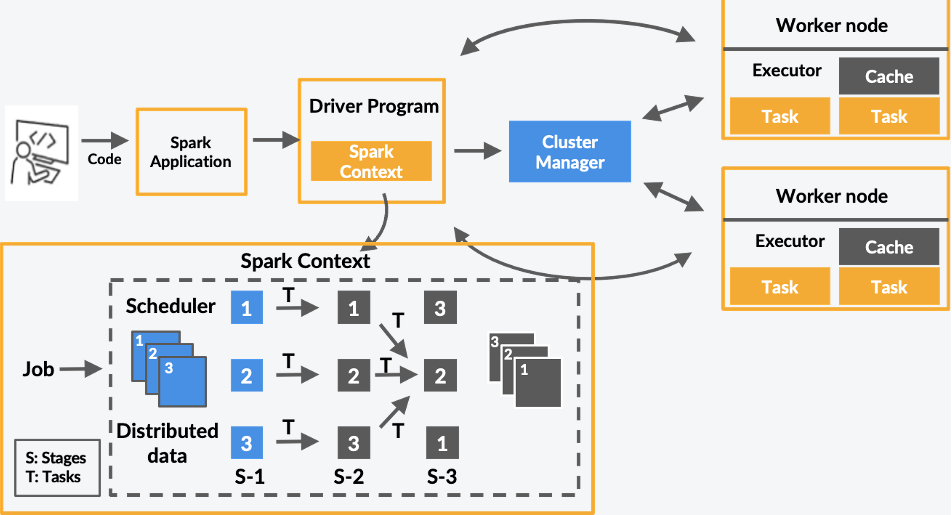

**Driver Process e Workers são executados dentro da JVM**

apesar de rodarem dentro da JVM, Driver Process e cada entidade de Workers são executados em VM's distintas com o intuito de minizar conflitos e garantir o gerenciamento de dados

## **Driver Program**

é responsável por:

*   fazer a manutenção da informação sobre a aplicação Spark

*   responder a um input ou output do programa do usuário

*   analizar, distribuir e fazer schedule nos workers

*   realizar as partições dos dados

## **Schema**

controla os dados e ajuda na otimização de queries sobre dataframes

contém informações a respeito de nome de colunas, tipo de colunas, valore nulos, dentre outras características dos dados que residem no dataframe

a definição de Schemas pode ser feita usando lista de Structs

**StructType é o objeto que armazena informações de cada StructField, que por sua vez armazena informações a respeito de cada coluna**

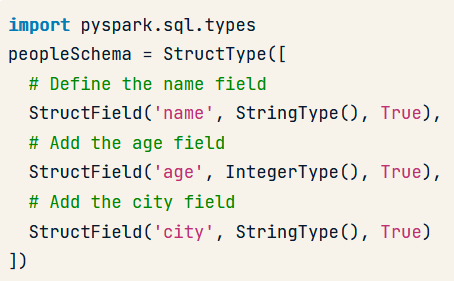

## *StructField*
*   ****
kwargs

*   **name:str** nome do campo

*   **dataType:pyspark.sql.types.DataType** tipo de dado do campo

*   **nullable=True** define se o campo pode ou nao aceitar dados do tipo null

*   **metadata:Optional[Dict[str,Any]]=None** permite designar metadados ao tipo da coluna

## **Worker Nodes**

se tratam das VM's que executarão os processos enviados pelo Driver Program e gerenciados pelo Cluster Manager

se executado de modo local, os worker nodes fazem o papel de Driver Manager e Worker Node

**o numero de tasks executadas em paralelo dependem do numero de cores do processador de cada worker**

seus papéis na arquitetura Spark são:

*   executar o código a ele designado pelo driver process

*   reportar o estado da execução da computação de volta ao driver process

quando configurado um ambiente Spark **é mais performático termos mais Workers do Workers mais potentes**

## **SparkContext**

realiza o controle da Spark Application por meio da Spark Session sendo localizada dentro do Driver Process

**conecta o DriverManager ao Cluster**

pode ser acessada no shell usando o **sc**

**é necessário parar (.stop()) um SparkContext par iniciar outro dado que uma JVM só pode ter um**

pode ser usado para:

*   criação de RDD

*   criação de accumulators

*   criação de broadcast variables

em sua definição é necessário pelo menos determinar o master e o appName

### *atributos*

#### **.version**

exibe a versão do sc

#### **.pythonVer**

exibe a versão do python utilizada

#### **.master**

**se refere ao local onde está o cluster**

pode ser uma url ou string

### *métodos*

#### **sc.parallelize()**

realiza o carregamento de dados usando o SparkContext

**atua sobre uma lista**

**gera uma RDD**

*   ****
kwargs

* **minPartitions=** determina o numero mínimo de partições realizados na criação da RDD


*   **maxPartitions=**

#### **sc.textFile()**

usa de um arquivo externo para fazer o carregamento

**gera uma RDD**

*   ****
kwargs

*   **minPartitions=**

*   **maxPartitions=**

## **SparkSession**

**por meio de SparkSession podemos criar dataframes, registrá-los e executar SQL queries sobre eles**

é armazenada por padrão na **variável spark** no shell

tem como função primordial executar as UDF's ao longo do cluster

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master('local').appName('test').getOrCreate()
spark

master se refere ao tipo de cluster manager

podemos alterar o numero de partições usando o objeto spark que armazena o SparkSession por padrão

In [10]:
spark.conf.set('spark.sql.shuffle.partition', '5')

podemos obter informações a respeito das configurações do SparkSession usando o seguinte comando

In [5]:
# spark.conf.get()

### *atributos*

#### **.catalog**

contém informações acerca de todos os dados dentro do cluster

#### **.read**

permite a leitura de dados de diferentes tipos

### *métodos*

#### **.getOrCreate()**

utilizada para a criação ou captação de uma SparkSession, sem tal comando não ocorre a efetiva criação da SparkSession

#### **.sql()**

permite a execução de queries sobre o dataframe

#### **.show()**

metodo que possibilita a exibição do resultado de uma transformação. se trata de uma ação

#### **.toPandas()**

permite a conversão de um dataframe spark para o tipo pandas

#### **.createDataFrame()**

permite a criação de um spark Dataframe a partir de diversos tipode de objetos como pyarrow, pandas, dicts, rows, etc

**o dataframe gerado fica armazenado localmente e não no cluster**, logo, o uso de .catalog.listTables() não retornaria nada, bem como o uso de .sql() resultaria num erro

#### **.createTempView()**

**usado para a criação de uma view temporaria no cluster, permitindo o uso de métodos como .sql() e .catalog.listTables()**

seu unico argumento é o nome da view a ser criada

**por ser temporária poder ser acessada somente pela SparkSession que a gerou**

#### **.createOrReplaceTempView()**

**cria de modo mais moderado uma view temporária dado que se existente ele fará a substituição da view, não desencadeando em erros**

#### **.withColumn()**

permite operações sobre colunas gerando novas

**primeiro argumento é o nome da nova coluna**

**segundo argumento é a operação**

#### **.table()**

permite a **criação de um data frame de modo persistente na memória e registrado no catalog** a partir de um outro data frame, como por exemplo pandas

#### **.filter()**

realiza a filtração de um dado data frame de acordo com um booleano passado como argumento podendo ser feita de duas formas:

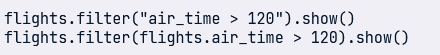

#### **.select()**

equivalente ao select de SQL e polars

aceita tanto objetos do tipo coluna (df.col) como nome da coluna no formato de strings

**não precisa ser uma lista de objetos, podem ser somente separados por vírgula**

podemos realizar operações sobre as colunas, porém, somente as colunas selecionadas serão retornadas, ao contrário de withColumn()

#### **.alias()**

permite a renomeação de uma coluna que está sendo selecionada

#### **.selectExpr()**

realiza operações sobre colunas e seleciona usando strings como valores e adotando a lógica de SQL

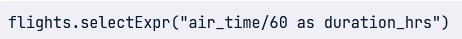

#### **.groupBy()**

mesmo intuito do polars, pandas e SQL

retorna um data frame agrupado e agregado baseado numa função de agregação

segue um exemplo de sua sintaxe:

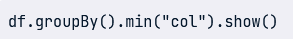

o resultado dessa operação é um **pyspark.sql.GroupedData**

#### **.min()**

#### **.max()**

#### **.avg()**

#### **.sum()**

#### **.count()**

#### **.agg()**

permite executar operações de agregação vindas de pyspark.sql.functions

#### **.join()**

how = [inner, cross, outer, full, fullouter, full_outer, left, leftouter, left_outer, right, rightouter, right_outer, semi, leftsemi, rightsemi, left_semi, right_semi, anti, leftanti, left_anti]

on = str or list de colunas

#### **.withColumnRenamed()**

renomeia colunas de um data frame

#### **.cast()**

usado para transformar o tipo de dados

**opera somente sobre colunas/series**

#### **.createDataFrame()**

## **RDD (Resilient Distributed Datasets)**

**espinha dorsal do pyspark**

SparkSQL, MLlib, GraphX e SparkStreaming são todos desenhados em cima de RDD's

durante o processamento de dados o Driver Process (SparkContext) cria RDD's e a particiona, distribuindo entre os nodes (workers) localizados no Cluster, **logo, uma RDD é a junção de todas as partições**

é denominada: 

*   resiliente devido a sua propriedade de lidar com falhas na execução de suas partições. e, caso de falhas de um worker node o Spark solicita que outro node recalcule o processo perdido

*   distribuída devido a sua distribuição de partições entre nodes (workers) localizados em múltilas maquinas

*   datasets advém do tipo de coleção tratado que são arrays, tuplas, tabelas, dentre outras

são geralmente executadas na memória principal

nela são efetuados os processamento de dados

podem ser armazenadas em HDFS e NoSQL

armazenam os dados na memória

**motivações para seu uso**:

1.  executar transformações, ações e controle de baixo nívem m conjunto de dados

2.  uso de NoSQL

3.  programação funcional

4.  forte tipagem de colunas

### *tipos de RDD*

#### **pair RDD**

**funciona no modelo key-value para cada linha**

todas transformações de RDD podem ser executadas em pair RDD

para realizar transformações devemos passar funções que operam no modo key-value

**ex.: .reduceByKey(), .groupByKey(), .sortByKey(), .join()**

pode ser criada das seguintes formas por exemplo (mais comuns):

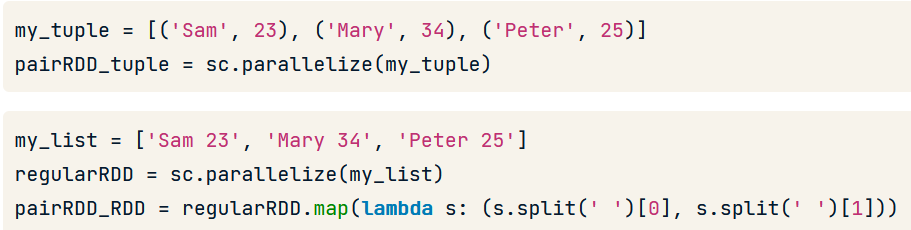

### *métodos*

#### **.saveAsTextFile()**

**ação**

**ela faz o armazenamento da RDD onde cada partição é um arquivo único em um sistema de armazenamento como HDFS, S3, ADLS2**

usada para em situações onde a RDD é de grande porte em memória, em situações como essa .collect() não é recomendado

#### **.coalesce()**

**ação**

**faz com que uma nova RDD seja retornada e reduzida a uma quantidade específica de partições**

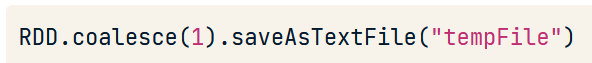

#### **.getNumPartitions()**

**ação**

retorna o numero de partições em uma dada RDD

#### **.persist()**

**ação**

torna a operação persistente na memória após a sua primeira computação (cache?)

#### **.map()**

aplica uma função a todos os elementos de uma RDD

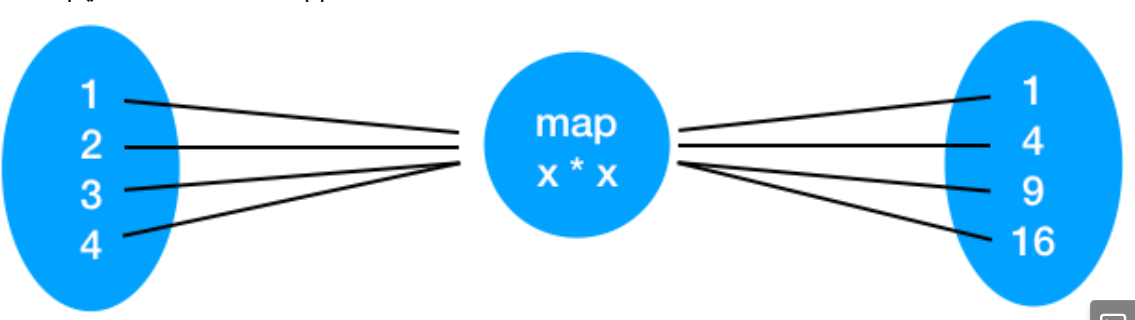

#### **.flatMap()**

retorna multiplos valores para cada elemento da RDD

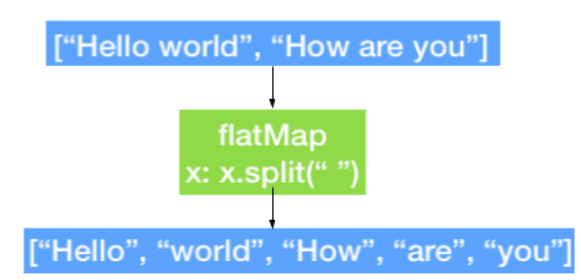

#### **.filter()**

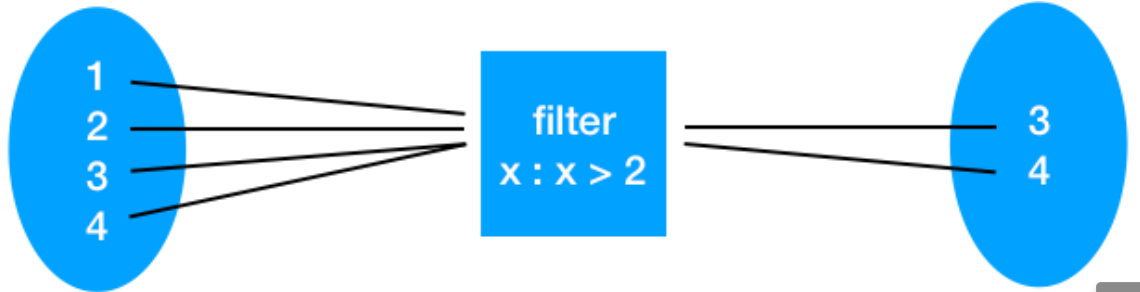

#### **.union()**

análogo a UNION do SQL

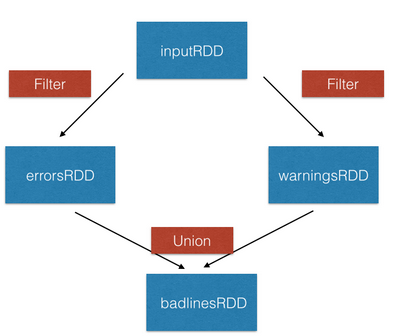

#### **.take()**

**ação**

retorna as N linhas passadas como argumento da RDD

#### **.first()**

**ação**

retorna o primeiro elemento da RDD

#### **.last()**

**ação**

retorna o último elemento da RDD

#### **.count()**

**ação**

realiza o número de elementos na RDD

#### **.reduceByKey()**

combina valores com a mesma key

**roda operações em paralelo para cada key**

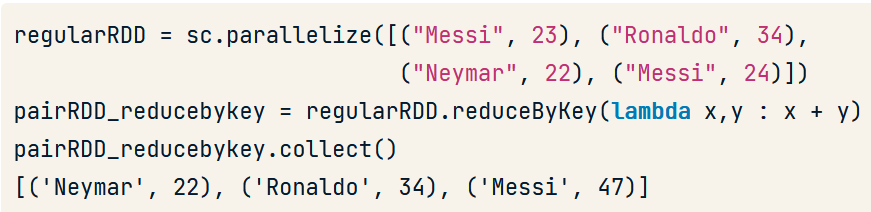

#### **.reduce()**

usada para agregação de elementos de uma RDD comum

a função deve ser comutativa (ao alterar a ordem das variáveis o resultado é o mesmo) e associativa

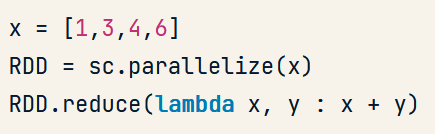

#### **.sortByKey()**

ordena as keys com bases em seus valores entre si

pode ser de modo asc ou desc

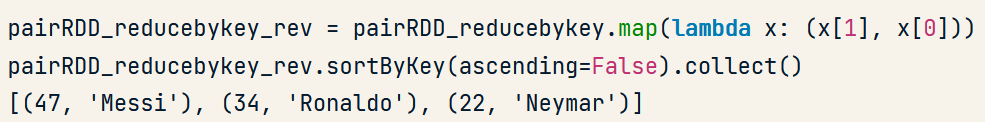

*   ****
kwargs

*   **ascending=True**

#### **.groupByKey()**

agrupa valores com a mesma key

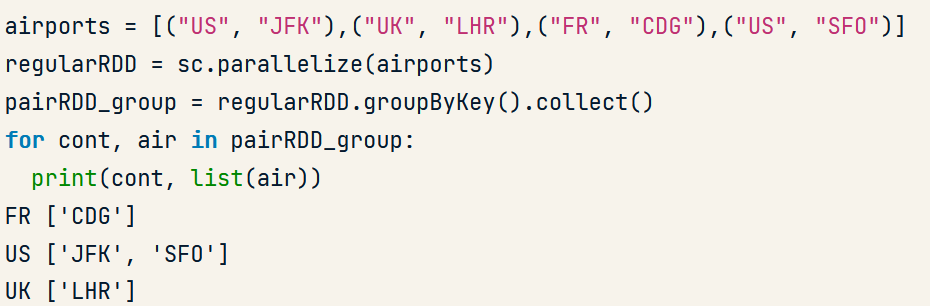

#### **.countByKey()**

**ação**

performada em pair RDDs

**permite realizar a contagem de elementos para cada key**

retorna um dicionário

**é recomendado seu uso somente em casos onde a pair RDD/dataset é tamanha suficiente para caber na memória RAM**

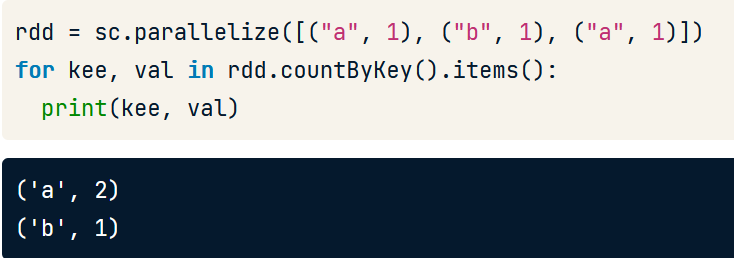

#### **.collectAsMap()**

**ação**

faz o retorno do par key-value de uma pair RDD como um dicionário

**é recomendado seu uso somente em casos onde a pair RDD/dataset é tamanha suficiente para caber na memória RAM**

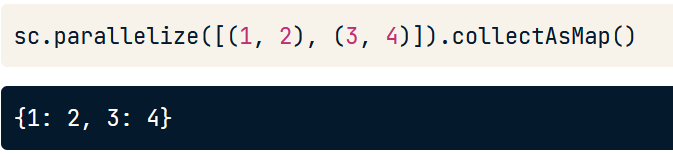

#### **.collect()**

**ação**

retorna todos os elementos da RDD no formato de array

**permite a extração de informação das RDDs e armazenamento em variáveis**

#### **.join()**

em caso de pair RDD ela performa a junção das duas pair RDD's com base em suas keys

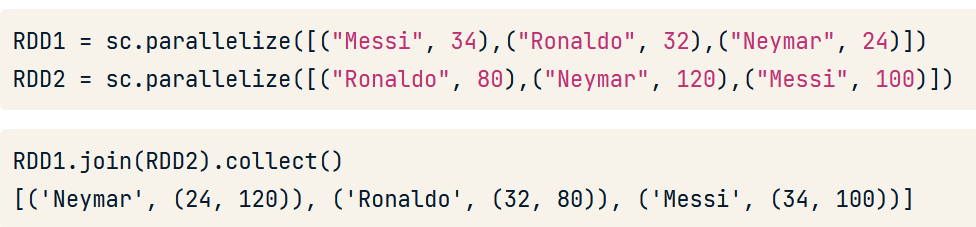

### *Tipos de Operação*

são transformações de dados ou ações realizadas em um RDD

#### *Transformação*

transforma um RDD e retorna outro RDD

operam no modo Lazy

exemplos: filter, map, ...

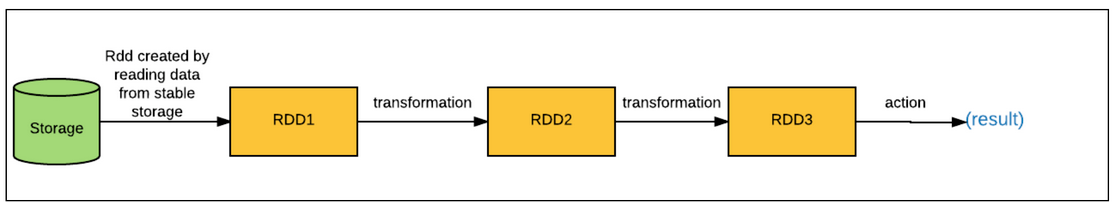

##### **Narrow**

cada partição está relacionada a uma partição do output

automticamente gera um pipeline

##### **Shuffle/Wide**

o produto cartesiano das partições gera o output

o shuffle ocorre dentro do Spark Trigger

é uma operação custosa e deve ser evitada

envolve basicamente copiar dados entre workers (e seus executors) e VM's

**o shuffling poder ser minimizado empregando o método de dataframes .repartition()**

#### *Ações*

atua como trigger daqs computações feitas por meio de transformações

existem três tipos de ações:

*   ações que expõe dados no console

*   ações para coleta de dados e transforma em objetos nativos da API usada

*   ações que escrevem dados em outros formatos

ex.: retorna uma constante

### *Shared variables*

**variáveis globais são fixas**

não é recomendado o uso de funções que demandam de um objeto cujo atributo é utilizado no corpo da função. isto devido ao fato de o cluster necessitar incorporar aquele objeto como um todo para realizar o cálculo

é mais recomendado performáticamente o acesso de atributos dentro do corpo da UDF desse modo somente a variável é copiada no cluster

In [9]:
# não recomendado
import polars as pl
def x(df:pl.DataFrame):
    return df.shape

# recomendado
def x(self):
    return self.shape

ModuleNotFoundError: No module named 'polars'

#### *Accumulators*

variável global que pode ou não ser mutável e que permite ao cluster realizar de modo seguro updates por linha

melhores em operações de agregação em termos de performance que funções de agregação

garatem que variáveis globais tenham seu valor atualizado de modo desejado dentro dos clusteres

exemplos de uso: counters e sums

##### **Mutáveis**

Lidas e escritas por tasks

##### **Imutáveis**

somente podem ser lidas por tasks

#### *Broadcast*

podem ser usadas para fazer o cache na memória dos worker nodes

a relação entre dataframes e views temporárias podem ser observadas no seguinte diagrama:

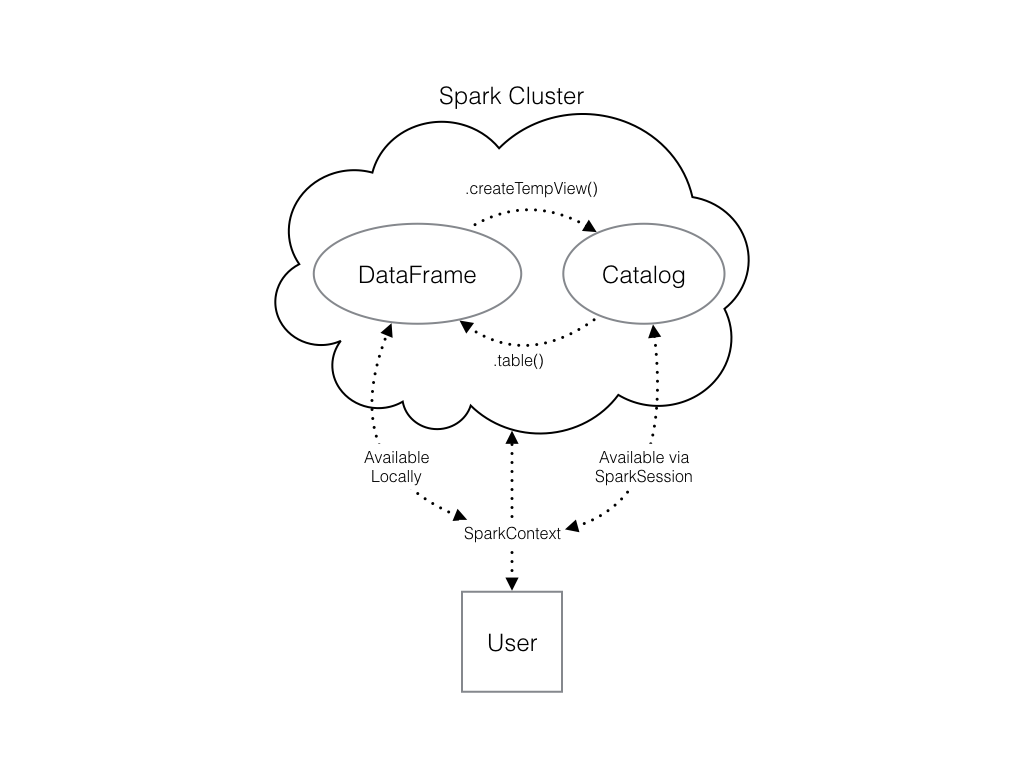

# Objetos

### **pyspark.sql.dataframe.DataFrame**

**é uma API do framework Spark**

diferentemente do pandas, um dataframe é imutável, assim como no polars

**logo toda alteração realizada deve ser atribuida a uma nova variável**

provê mais informações a respeito do tipo do dado e sua computação

desenhados para processar dados estruturados e semiestruturados como csv e JSON

**podemos executar operações de SQL ou realizar a mesma operação usando seus métodos sem perda de eficiência**

**SQL queries não podem ser performadas diretamento no dataframe e sim no SparkSession. para isso ser possível é necessário criar a tabela no SparkSession usando métodos do dataframe como .createTempView() ou .createOrReplaceTempView(), desse modo os dados ficam de modo persistentes do SparkSession e por meio do método .sql() do objeto SparkSession podemos performar queries**

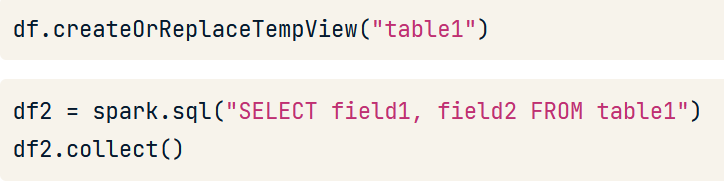

**SparkSession realiza com dataframes que SparkContext realiza em RDDs**

podem ser criados de diversas formas como por exemplo:

*   a partir de RDD usando o método .createDataFrame()

*   via leitura de arquivos de diversos formatos

a criação de um dataframe a partir de uma RDD depende primeiro da criação da RDD seguida do nome de colunas passados como uma lista de strings

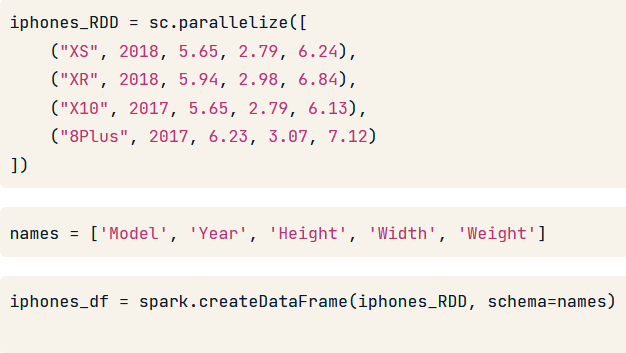

para a criação de um dataframe a partir de um arquivo csv, JSON ou txt o seguinte procedimento é adotado

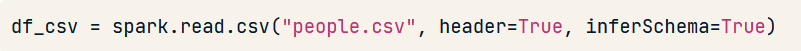

assim como RDDs dataframes suportam transformações e ações

a criação de gráficos via pyspark não é possível usando as bibliotecas gráficas comuns, desse modo 3 estratégias podem ser adotadas:

*   conversão para um pandas.core.dataframe.DataFrame usando o método **.toPandas()**

*   uso da biblioteca **pyspark_dist_explore**

*   uso da biblioteca **HandySpark**

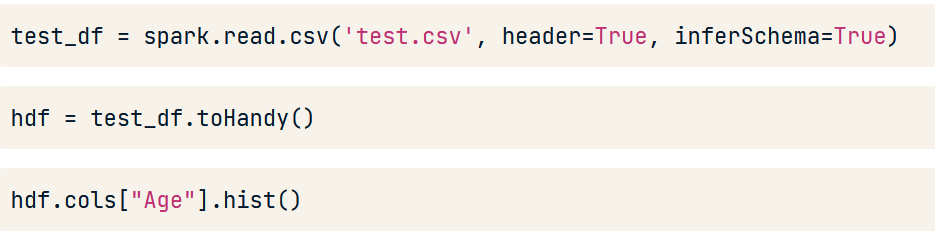

podemos definir UDF's no Spark. para isso o único requisito é a UDF passar a função dentro da função pyspark.sql.functions.udf

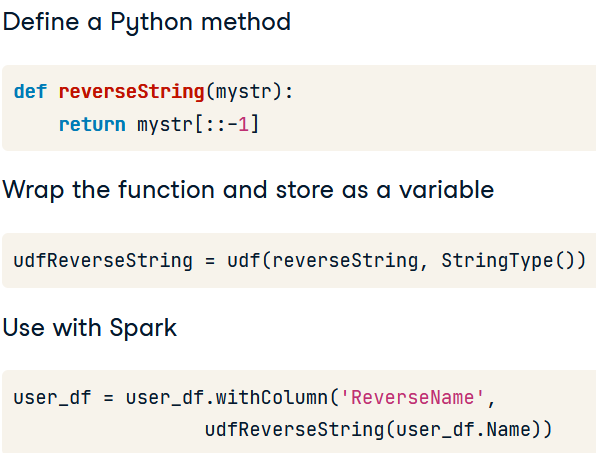

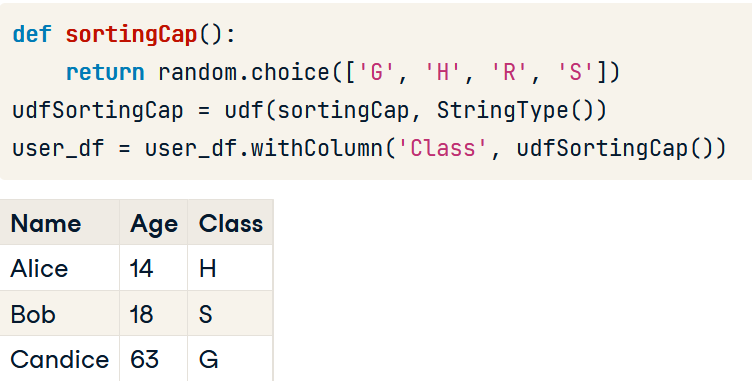

### *atributos*

#### **.columns**

#### **.is_cached**

### *transformações*

retorna um novo dataframe

#### **.select()**

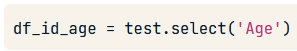

#### **.filter()**

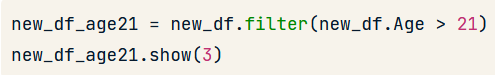

#### **.groupBy()**

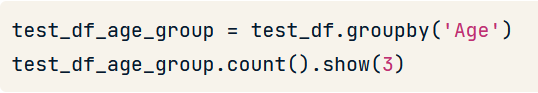

#### **.orderBy()**

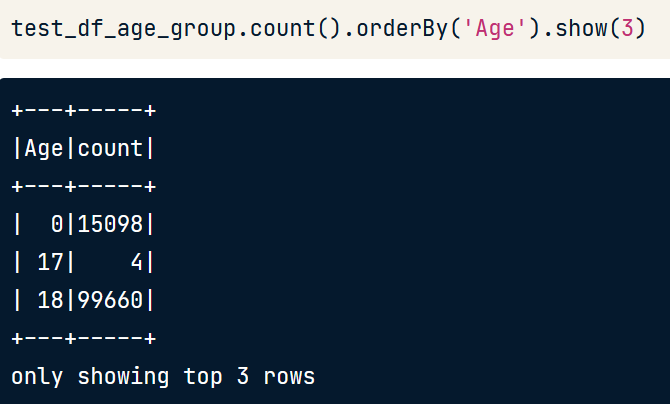

#### **.dropDuplicates()**

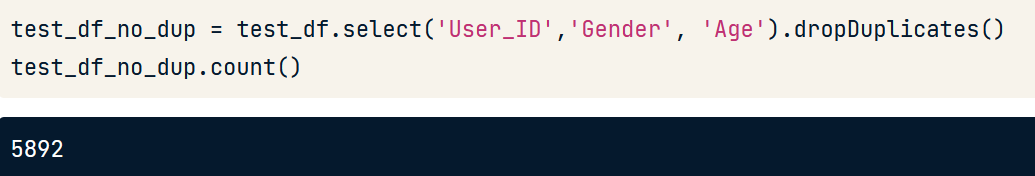

#### **.drop()**

permite a deleção de colunas de um dataframe

#### **.withColumnRenamed()**

renomeia colunas do dataframes

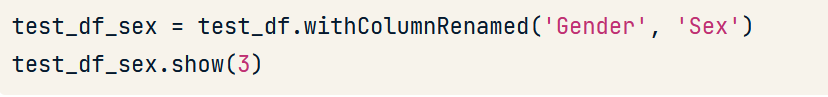

#### **.size()**

retorna o tamanho de uma coluna

#### **.getItem()**

retorna um item específico pelo seu index de uma coluna

#### **.rdd.max()**

retorna o valor máximo de uma dada coluna transformando primeiro num rdd e depois pegando seu valor máximo

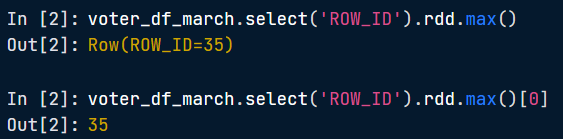

#### **.cache()**

realiza o armazenamento no cache

fazer cache dos dataframes e averiguar seu desempenho pode auxiliar na otimização do código

as desvantagens do uso do cache são:

*   datasets muito grandes podem nao caber na memória

*   objetos armazenados no cache podem nao se encontrar disponiveis 

*   fazer cache no disco local pode nao gerar aumento de desempenho

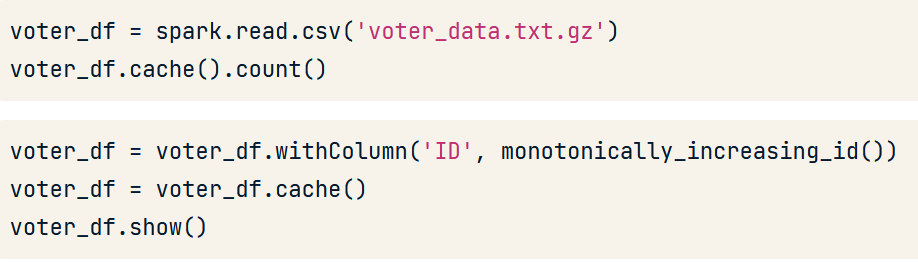

#### **.unpersist()**

remove o objeto do cache

#### **.repartition()**

permite aumentar o numero de partições, minimizando o shuffling

#### **.coalesce()**

permite diminuir o numero de partições

### *ações*

executa as transformações de fato

#### **.printSchema()**

printa o tipo de dados de colunas do dataframe bem como suas constraints

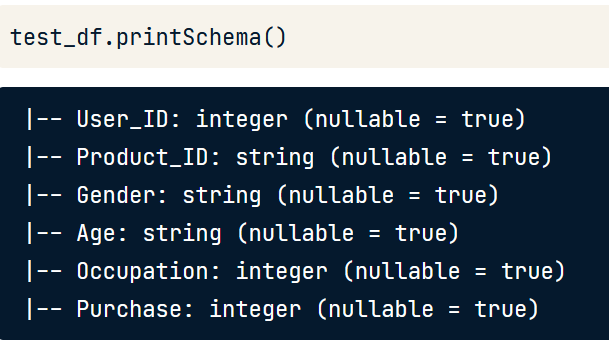

#### **.head()**

#### **.show()**

printa por padrão as 20 primeiras linhas do dataframe

**assim como print padrão do python, ele retorna None quando designado a uma variável**

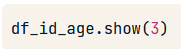

#### **.count()**

pode ser usado para contabilizar o numero de linhas de um dataframe

#### **.describe()**

retorna estatísticas descritivas de colunas numéricas

permite especificar a coluna de interesse, se não for especificado, retorna de todas

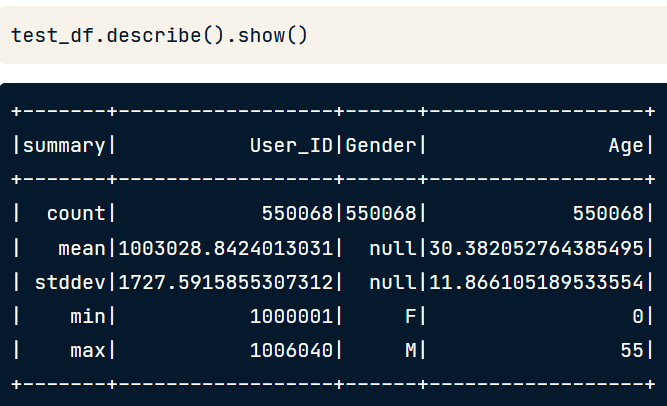

#### **.rdd.getNumPartitions()**

retorna o numero de partições do dataframe

## Machine Learning

### **pyspark.ml.Transform**

classes desse tipo possuem um método **.transform()** que aceita um dataframe e retorna outro dataframe, geralmente o primeiro dataframe com a adição de novas linhas

exemplos são:

*   **Bucketizer**: cria bins discretos de uma feature contínua

*   **PCA**: reduz a dimensionalidade do dataset usando análise dos componentes principais

### **pyspark.ml.Estimator**

são classes que podem implementar um método **.fit()**

eles aceitam um data frame mas **retornam um model object**

exemplos são:

*   **RandomForestModel**: usa de algoritmos de random forest para classificação ou regressão

*   **StringIndexerModel**: usado para incluir dados categóricos salvos como strings nos modelos de modo numérico (cria dummies). retorna um pyspark.ml.Transform

### **pyspark.ml.Pipeline**

realiza a combinação de pyspark.ml.Estimator e pyspark.ml.Transform

# pyspark.sql.functions

## **.abs()**

## **.max()**

## **.min()**

## **.avg()**

## **.stddev()**

## **.count_distinct()**

## **.monotonically_increasing_id()**

usa para a produção de ID's que aumentam constantemente ao longo do dataframe

**podem existir gaps entre um ID e outro**

## **.collect_set()**

retorna os valores únicos de uma dada coluna

## **.broadcast()**

**faz uma cópia de cada objeto em cada worker minimizando o shuffling dado que a comunicação entre os workers diminui**

## **.size()**

retorna o tamanho de uma lista ou array armazenada em uma coluna

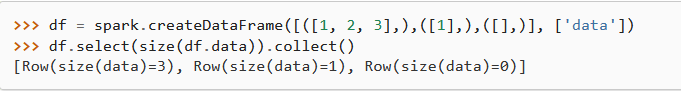